## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

#### Cho dữ liệu https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau:

# Yêu cầu

# Câu 1: 
- Đọc dữ liệu và gán vào biến chipo 
- Hiển thị 10 dòng đầu của dữ liệu

# Câu 2: 
- Tạo dataframe df gồm 2 cột: tên món ăn và đếm các món ăn

# Câu 3:
- a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
- b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất, có title, xlabel, ylabel và xticks

# Câu 4: 
- a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
- b) Tạo cột revenue, với revenue = quantity * item_price
- c) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, in kết quả

# Câu 5: 
- Từ câu 4b, hãy vẽ scatterplot với x là revenue,  và y là quantity, có title, xlabel, ylabel. Bạn có nhận xét gì qua biểu đồ này 

# Câu 6: 
- Vẽ bar chart với x là các món ăn và y là tổng thành tiền. Vẽ cho 5 món có tổng thành tiền lớn nhất

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo 
chipo = pd.read_csv('chipotle.tsv', delimiter='\t')
chipo.head(10)

# Hiển thị 10 dòng đầu của dữ liệu


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
  <div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>\$2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>\$3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>\$3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>\$2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>\$16.98</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>1</td>
      <td>Chicken Bowl</td>
      <td>[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...</td>
      <td>\$10.98</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>1</td>
      <td>Side of Chips</td>
      <td>NaN</td>
      <td>\$1.69</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Tomatillo Red Chili Salsa, [Fajita Vegetables...</td>
      <td>\$11.75</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Soft Tacos</td>
      <td>[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...</td>
      <td>\$9.25</td>
    </tr>
    <tr>
      <th>9</th>
      <td>5</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...</td>
      <td>\$9.25</td>
    </tr>
  </tbody>
</table>
</div>
</details>

In [22]:
# Câu 2: tạo dataframe df gồm 2 cột: tên món ăn và đếm các món ăn
df = chipo.groupby(by='item_name', as_index=False).size()
df.rename(columns={'size': 'cnt'}, inplace=True)
df.head()

,item_name,cnt
0,6 Pack Soft Drink,54
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,11
4,Barbacoa Salad Bowl,10


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
  <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>item_name</th>
      <th>cnt</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6 Pack Soft Drink</td>
      <td>54</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Barbacoa Bowl</td>
      <td>66</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Barbacoa Burrito</td>
      <td>91</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Barbacoa Crispy Tacos</td>
      <td>11</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Barbacoa Salad Bowl</td>
      <td>10</td>
    </tr>
  </tbody>
</table>
</details>

In [23]:
# Câu 3:
# a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
df.sort_values(by='cnt', ascending=False).head(5)

,item_name,cnt
17,Chicken Bowl,726
18,Chicken Burrito,553
25,Chips and Guacamole,479
39,Steak Burrito,368
10,Canned Soft Drink,301


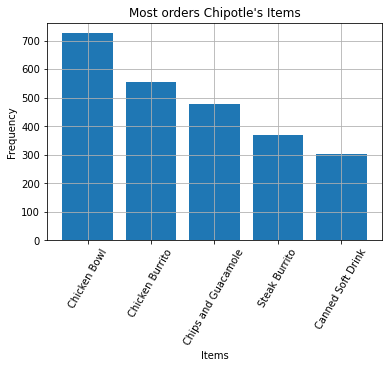

In [49]:
# b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất 
# (có title, xlabel, ylabel và xticks)
df_ = df.sort_values(by='cnt', ascending=False).head(5)
plt.bar(x=df_['item_name'], height=df_['cnt'])
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Most orders Chipotle\'s Items')
plt.xticks(rotation=60)
plt.grid()
plt.show()

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="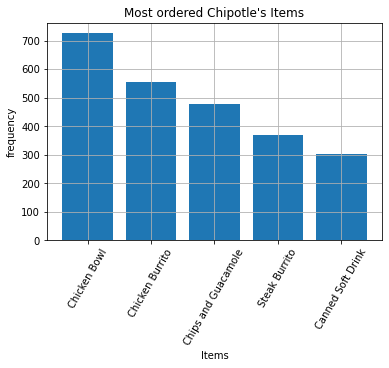
">
</details>

In [28]:
# Câu 4: 
# a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [29]:
# b) Tạo cột revenue, với revenue = quantity * item_price
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [34]:
# c) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi 
# và tổng giá trị của mỗi đơn hàng, 
# in kết quả
orders = chipo.groupby('order_id')[['quantity', 'revenue']].sum()
orders.head()

,quantity,revenue
order_id,,
1,4,11.56
2,2,33.96
3,2,12.67
4,2,21.00
5,2,13.70


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantity</th>
      <th>revenue</th>
    </tr>
    <tr>
      <th>order_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>11.56</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>33.96</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>12.67</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>21.00</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>13.70</td>
    </tr>
  </tbody>
</table>
</details>

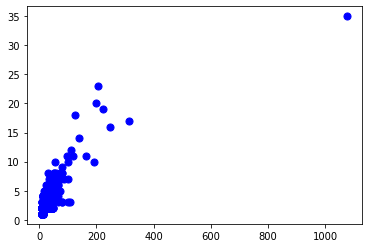

In [45]:
# Câu 5: Từ câu 4b, hãy vẽ scatterplot với x là revenue, 
# và y là quantity, có title, xlabel, ylabel
# Bạn có nhận xét gì qua biểu đồ này 
plt.scatter(x=orders['revenue'], y=orders['quantity'], s=50, c='blue')
plt.show()

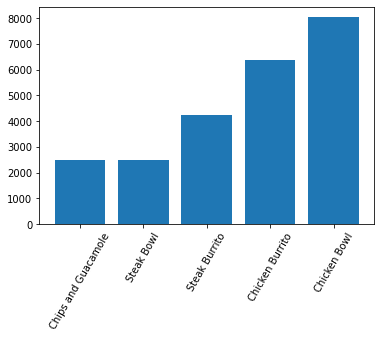

In [48]:
# Câu 6: vẽ bar chart với x là các món ăn, 
# và y là tổng thành tiền. Vẽ cho 5 món có tổng thành tiền lớn nhất
tmp = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head()
tmp = tmp.sort_values()

plt.figure(figsize=(6,4))
plt.bar(x=tmp.index, height=tmp.values)
plt.xticks(rotation=60)
plt.show()